In [18]:
%pylab notebook
import pycwt
import exdir
import exdir.plugins.quantities
import pathlib

Populating the interactive namespace from numpy and matplotlib


/home/mikkel/.virtualenvs/expipe/lib/python3.5/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['power', 'fft']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [19]:
rcParams['figure.figsize'] = (9, 6)

In [20]:
project = 'septum-mec'

action_id = '1809-191018-01'

channel_group = 0

channel = 0 # 0-3

In [21]:
path = pathlib.Path(project)
exdir_file = exdir.File(path / 'actions'/ action_id / 'data'/ 'main.exdir',
                       plugins=exdir.plugins.quantities)
lfp_group = exdir_file[
    'processing/electrophysiology/channel_group_{}/LFP/LFP_timeseries_{}'.format(channel_group, channel)]
data = lfp_group['data'].data.flatten()

sampling_frequency = lfp_group['data'].attrs['sample_rate'].magnitude
sampling_period = 1 / sampling_frequency

times = arange(0, sampling_period * len(data), sampling_period)

<IPython.core.display.Javascript object>


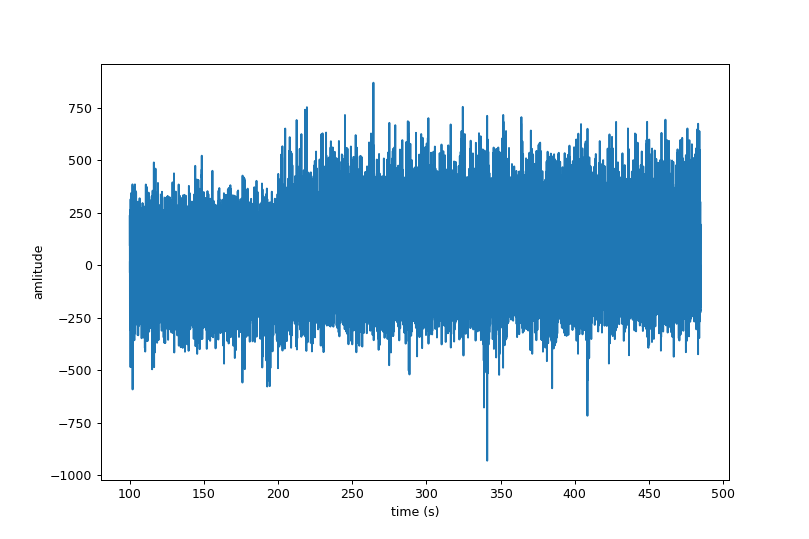

Text(0.5, 0, 'time (s)')

In [22]:
start_time = 100
stop_time = 500

mask = (start_time < times) & (times < stop_time) # seconds
figure()
plot(times[mask], data[mask])
ylabel('amlitude')
xlabel('time (s)')

In [15]:
def mask_coi(power, freqs, coi):
    periods = 1 / freqs
    for i in range(power.shape[1]):
        mask = periods > coi[i]
        power[mask, i] = nan

<IPython.core.display.Javascript object>


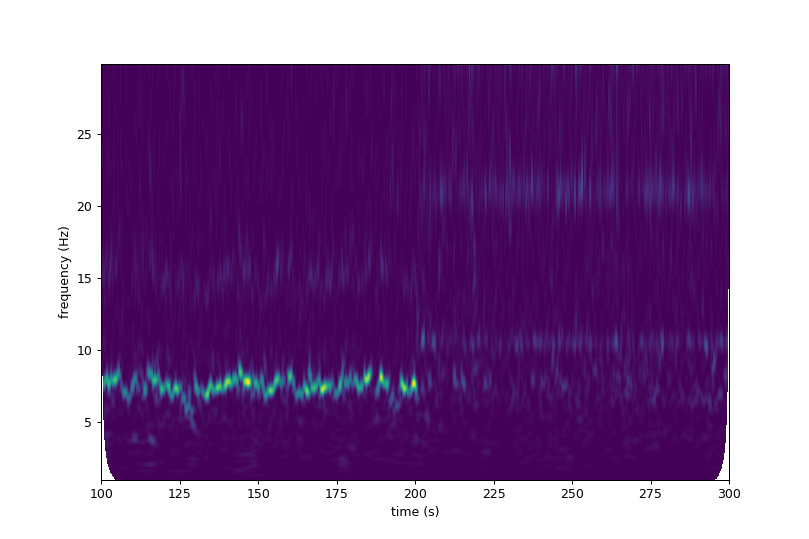

Text(0.5, 0, 'time (s)')

In [29]:
start_time = 100
stop_time = 300

mask = (start_time < times) & (times < stop_time) # seconds

mother = pycwt.Morlet(20) # Morlet size
freqs = arange(1, 30, .1) # Frequency range

wave, scales, freqs, coi, fft, fftfreqs = pycwt.cwt(data[mask], sampling_period, freqs=freqs, wavelet=mother)

power = (numpy.abs(wave)) ** 2
power /= scales[:, None] #rectify the power spectrum according to the suggestions proposed by Liu et al. (2007)

mask_coi(power, freqs, coi)

figure()
contourf(times[mask], freqs, power, levels=100)
    
ylabel('frequency (Hz)')
xlabel('time (s)')

In [ ]:
from matplotlib import ticker
figure()
contourf(times[mask], freqs, power, levels=100, locator=ticker.LogLocator())
    
ylabel('frequency (Hz)')
xlabel('time (s)')

<IPython.core.display.Javascript object>


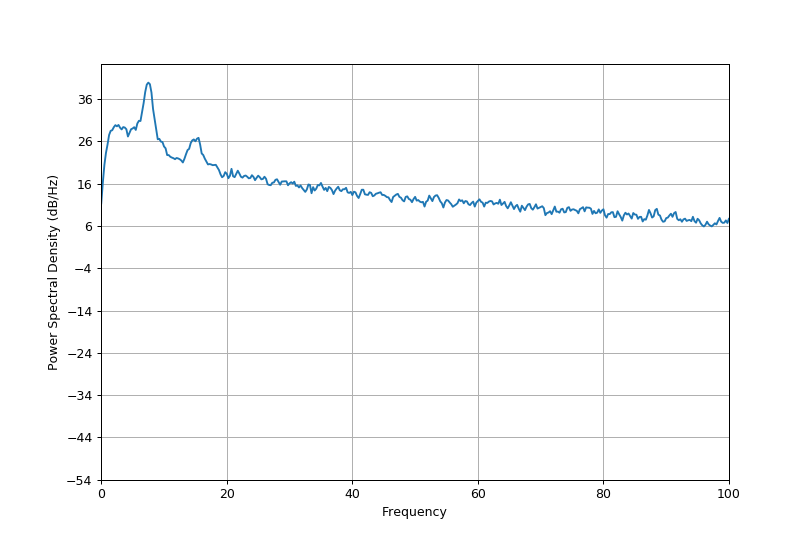

(0, 100)

In [13]:
start_time = 0
stop_time = 200

mask = (start_time < times) & (times < stop_time) # seconds

figure()
psd(data[mask], Fs=sampling_frequency, NFFT=4000)
xlim(0,100)